In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from xgboost import plot_importance

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks

In [5]:
df = pd.read_csv("data/santander-customer-satisfaction/train.csv")
df

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
76016,151830,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0
76017,151835,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0
76018,151836,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000,0


In [6]:
df.shape

(76020, 371)

In [7]:
df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [8]:
df['var3'].replace(-999999,2,inplace=True)
df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,2.716483,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,9.447971,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [9]:
df.drop('ID',axis=1,inplace=True)

In [10]:
print(df.TARGET.value_counts()[0]/(df.TARGET.value_counts()[0]+df.TARGET.value_counts()[1])*100)
print(df.TARGET.value_counts()[1]/(df.TARGET.value_counts()[0]+df.TARGET.value_counts()[1])*100)

96.0431465403841
3.9568534596158904


In [11]:
x=df.drop('TARGET',axis=1)
y=df['TARGET']

In [12]:
x

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000
76016,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000
76017,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000
76018,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000


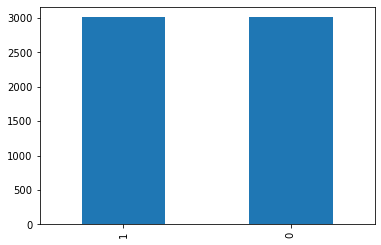

In [13]:
rus = RandomUnderSampler(sampling_strategy ='majority')
ux,uy=rus.fit_sample(x,y)
uy.value_counts().plot(kind='bar')

In [14]:
def get_clf_eval(y_test, pred = None, pred_proba = None):
    confusion = confusion_matrix(y_test, pred)
    accuacy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print('confusion')
    print(confusion)
    print('정확도 : {}'.format(np.around(accuacy,4)))
    print('정밀도: {}'.format(np.around(precision,4)))
    print('재현율 : {}'.format(np.around(recall,4)))
    print('F1 : {}'.format(np.around(f1,4)))  
    print('ROC_AUC : {}'.format(np.around(roc_auc,4)))

In [15]:
x_train,x_test,y_train,y_test = train_test_split(ux,uy)
lg_reg = LogisticRegression()

lg_reg.fit(x_train,y_train)
pred = lg_reg.predict(x_test)
pred_proba = lg_reg.predict_proba(x_test)[:,1]
get_clf_eval(y_test, pred, pred_proba)

confusion
[[760   1]
 [743   0]]
정확도 : 0.5053
정밀도: 0.0
재현율 : 0.0
F1 : 0.0
ROC_AUC : 0.6392


In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y)
lg_reg = LogisticRegression()

lg_reg.fit(x_train,y_train)
pred = lg_reg.predict(x_test)
pred_proba = lg_reg.predict_proba(x_test)[:,1]
get_clf_eval(y_test, pred, pred_proba)

confusion
[[18195     0]
 [  810     0]]
정확도 : 0.9574
정밀도: 0.0
재현율 : 0.0
F1 : 0.0
ROC_AUC : 0.6067


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
x.shape

(76020, 369)

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y)
xgb = XGBClassifier(n_estimators=500)
xgb.fit(x_train,y_train,early_stopping_rounds=100,eval_metric="auc",eval_set=[(x_train,y_train),(x_test,y_test)])

[0]	validation_0-auc:0.82039	validation_1-auc:0.80883
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.83308	validation_1-auc:0.81389
[2]	validation_0-auc:0.84043	validation_1-auc:0.82113
[3]	validation_0-auc:0.84534	validation_1-auc:0.82389
[4]	validation_0-auc:0.84978	validation_1-auc:0.82796
[5]	validation_0-auc:0.85406	validation_1-auc:0.83184
[6]	validation_0-auc:0.85649	validation_1-auc:0.83304
[7]	validation_0-auc:0.85924	validation_1-auc:0.83356
[8]	validation_0-auc:0.86345	validation_1-auc:0.83573
[9]	validation_0-auc:0.86636	validation_1-auc:0.83631
[10]	validation_0-auc:0.86994	validation_1-auc:0.83724
[11]	validation_0-auc:0.87256	validation_1-auc:0.83740
[12]	validation_0-auc:0.87521	validation_1-auc:0.83820
[13]	validation_0-auc:0.87796	validation_1-auc:0.83834
[14]	validation_0-auc:0.88011	validation_1-auc:0.84010
[15]	validation_0-auc:0.881

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [19]:
pred_prob = xgb.predict_proba(x_test)[:,1]

roc_auc_score(y_test,pred_prob,average='macro')

0.840721500606793

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y)
xgb = XGBClassifier(n_estimators=100)
params = {
    'max_depth':[5,7],
    'min_child_weigth':[1,3],
    'colsample_bytree':[0.5,0.75]
}
grid = GridSearchCV(xgb, param_grid = params, cv=3)

In [21]:
grid.fit(x_train,y_train,early_stopping_rounds=100,eval_metric="auc",eval_set=[(x_train,y_train),(x_test,y_test)])

[20:10:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { min_child_weigth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.71213	validation_1-auc:0.70017
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.74761	validation_1-auc:0.72029
[2]	validation_0-auc:0.82224	validation_1-auc:0.80135
[3]	validation_0-auc:0.82830	validation_1-auc:0.80956
[4]	validation_0-auc:0.83802	validation_1-auc:0.81857
[5]	validation_0-auc:0.84179	validation_1-auc:0.82136
[6]	validation_0-auc:0.83893	validation_1-auc:0.81788
[7]	validation_0-auc:0.84581	validation_1-auc:0.82089
[8]	validation_

[30]	validation_0-auc:0.87407	validation_1-auc:0.83454
[31]	validation_0-auc:0.87423	validation_1-auc:0.83487
[32]	validation_0-auc:0.87436	validation_1-auc:0.83486
[33]	validation_0-auc:0.87665	validation_1-auc:0.83495
[34]	validation_0-auc:0.87742	validation_1-auc:0.83397
[35]	validation_0-auc:0.87750	validation_1-auc:0.83380
[36]	validation_0-auc:0.87760	validation_1-auc:0.83402
[37]	validation_0-auc:0.87843	validation_1-auc:0.83378
[38]	validation_0-auc:0.87890	validation_1-auc:0.83308
[39]	validation_0-auc:0.87913	validation_1-auc:0.83276
[40]	validation_0-auc:0.87953	validation_1-auc:0.83241
[41]	validation_0-auc:0.87965	validation_1-auc:0.83220
[42]	validation_0-auc:0.87979	validation_1-auc:0.83184
[43]	validation_0-auc:0.88040	validation_1-auc:0.83162
[44]	validation_0-auc:0.88086	validation_1-auc:0.83130
[45]	validation_0-auc:0.88097	validation_1-auc:0.83130
[46]	validation_0-auc:0.88113	validation_1-auc:0.83127
[47]	validation_0-auc:0.88196	validation_1-auc:0.83103
[48]	valid

[70]	validation_0-auc:0.88938	validation_1-auc:0.82704
[71]	validation_0-auc:0.88934	validation_1-auc:0.82693
[72]	validation_0-auc:0.88932	validation_1-auc:0.82681
[73]	validation_0-auc:0.88988	validation_1-auc:0.82673
[74]	validation_0-auc:0.88983	validation_1-auc:0.82679
[75]	validation_0-auc:0.88984	validation_1-auc:0.82653
[76]	validation_0-auc:0.89001	validation_1-auc:0.82631
[77]	validation_0-auc:0.89005	validation_1-auc:0.82630
[78]	validation_0-auc:0.89006	validation_1-auc:0.82613
[79]	validation_0-auc:0.89030	validation_1-auc:0.82547
[80]	validation_0-auc:0.89046	validation_1-auc:0.82541
[81]	validation_0-auc:0.89065	validation_1-auc:0.82587
[82]	validation_0-auc:0.89082	validation_1-auc:0.82615
[83]	validation_0-auc:0.89126	validation_1-auc:0.82607
[84]	validation_0-auc:0.89129	validation_1-auc:0.82616
[85]	validation_0-auc:0.89175	validation_1-auc:0.82635
[86]	validation_0-auc:0.89211	validation_1-auc:0.82575
[87]	validation_0-auc:0.89209	validation_1-auc:0.82559
[88]	valid

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.73339	validation_1-auc:0.71227
[2]	validation_0-auc:0.81676	validation_1-auc:0.79595
[3]	validation_0-auc:0.83060	validation_1-auc:0.81178
[4]	validation_0-auc:0.83921	validation_1-auc:0.82088
[5]	validation_0-auc:0.84214	validation_1-auc:0.82492
[6]	validation_0-auc:0.83950	validation_1-auc:0.82134
[7]	validation_0-auc:0.84513	validation_1-auc:0.82616
[8]	validation_0-auc:0.84434	validation_1-auc:0.82233
[9]	validation_0-auc:0.84315	validation_1-auc:0.82122
[10]	validation_0-auc:0.84984	validation_1-auc:0.82644
[11]	validation_0-auc:0.85396	validation_1-auc:0.83036
[12]	validation_0-auc:0.85640	validation_1-auc:0.83106
[13]	validation_0-auc:0.85814	validation_1-auc:0.83256
[14]	validation_0-auc:0.85899	validation_1-auc:0.83076
[15]	validation_0-auc:0.86161	validation_1-auc:0.83176
[16]	validation_0-auc:0.86214	validation_1-auc:0.83076
[17]	validation_0-auc:0.86285	validation_1-auc:0.83144
[18]	vali

[40]	validation_0-auc:0.88169	validation_1-auc:0.83009
[41]	validation_0-auc:0.88181	validation_1-auc:0.83020
[42]	validation_0-auc:0.88224	validation_1-auc:0.83014
[43]	validation_0-auc:0.88242	validation_1-auc:0.83003
[44]	validation_0-auc:0.88299	validation_1-auc:0.82931
[45]	validation_0-auc:0.88315	validation_1-auc:0.82912
[46]	validation_0-auc:0.88334	validation_1-auc:0.82916
[47]	validation_0-auc:0.88372	validation_1-auc:0.82930
[48]	validation_0-auc:0.88396	validation_1-auc:0.82922
[49]	validation_0-auc:0.88461	validation_1-auc:0.82894
[50]	validation_0-auc:0.88492	validation_1-auc:0.82873
[51]	validation_0-auc:0.88498	validation_1-auc:0.82857
[52]	validation_0-auc:0.88533	validation_1-auc:0.82846
[53]	validation_0-auc:0.88560	validation_1-auc:0.82834
[54]	validation_0-auc:0.88566	validation_1-auc:0.82814
[55]	validation_0-auc:0.88583	validation_1-auc:0.82785
[56]	validation_0-auc:0.88630	validation_1-auc:0.82761
[57]	validation_0-auc:0.88651	validation_1-auc:0.82756
[58]	valid

[80]	validation_0-auc:0.91029	validation_1-auc:0.81499
[81]	validation_0-auc:0.91039	validation_1-auc:0.81451
[82]	validation_0-auc:0.91038	validation_1-auc:0.81457
[83]	validation_0-auc:0.91043	validation_1-auc:0.81449
[84]	validation_0-auc:0.91112	validation_1-auc:0.81455
[85]	validation_0-auc:0.91107	validation_1-auc:0.81440
[86]	validation_0-auc:0.91128	validation_1-auc:0.81417
[87]	validation_0-auc:0.91138	validation_1-auc:0.81384
[88]	validation_0-auc:0.91135	validation_1-auc:0.81384
[89]	validation_0-auc:0.91160	validation_1-auc:0.81334
[90]	validation_0-auc:0.91160	validation_1-auc:0.81322
[91]	validation_0-auc:0.91182	validation_1-auc:0.81303
[92]	validation_0-auc:0.91210	validation_1-auc:0.81229
[93]	validation_0-auc:0.91236	validation_1-auc:0.81199
[94]	validation_0-auc:0.91232	validation_1-auc:0.81177
[95]	validation_0-auc:0.91239	validation_1-auc:0.81131
[96]	validation_0-auc:0.91286	validation_1-auc:0.81107
[97]	validation_0-auc:0.91305	validation_1-auc:0.81063
[98]	valid

[10]	validation_0-auc:0.86987	validation_1-auc:0.82109
[11]	validation_0-auc:0.87333	validation_1-auc:0.82495
[12]	validation_0-auc:0.87564	validation_1-auc:0.82631
[13]	validation_0-auc:0.87734	validation_1-auc:0.82439
[14]	validation_0-auc:0.87799	validation_1-auc:0.82304
[15]	validation_0-auc:0.88067	validation_1-auc:0.82655
[16]	validation_0-auc:0.88138	validation_1-auc:0.82598
[17]	validation_0-auc:0.88394	validation_1-auc:0.82704
[18]	validation_0-auc:0.88646	validation_1-auc:0.82678
[19]	validation_0-auc:0.88731	validation_1-auc:0.82613
[20]	validation_0-auc:0.88803	validation_1-auc:0.82684
[21]	validation_0-auc:0.88989	validation_1-auc:0.82715
[22]	validation_0-auc:0.89011	validation_1-auc:0.82739
[23]	validation_0-auc:0.89025	validation_1-auc:0.82701
[24]	validation_0-auc:0.89069	validation_1-auc:0.82617
[25]	validation_0-auc:0.89249	validation_1-auc:0.82549
[26]	validation_0-auc:0.89357	validation_1-auc:0.82537
[27]	validation_0-auc:0.89443	validation_1-auc:0.82520
[28]	valid

[50]	validation_0-auc:0.89994	validation_1-auc:0.82406
[51]	validation_0-auc:0.90051	validation_1-auc:0.82351
[52]	validation_0-auc:0.90062	validation_1-auc:0.82358
[53]	validation_0-auc:0.90133	validation_1-auc:0.82401
[54]	validation_0-auc:0.90142	validation_1-auc:0.82366
[55]	validation_0-auc:0.90148	validation_1-auc:0.82327
[56]	validation_0-auc:0.90173	validation_1-auc:0.82311
[57]	validation_0-auc:0.90238	validation_1-auc:0.82267
[58]	validation_0-auc:0.90337	validation_1-auc:0.82288
[59]	validation_0-auc:0.90337	validation_1-auc:0.82275
[60]	validation_0-auc:0.90378	validation_1-auc:0.82243
[61]	validation_0-auc:0.90383	validation_1-auc:0.82241
[62]	validation_0-auc:0.90381	validation_1-auc:0.82205
[63]	validation_0-auc:0.90397	validation_1-auc:0.82196
[64]	validation_0-auc:0.90397	validation_1-auc:0.82183
[65]	validation_0-auc:0.90500	validation_1-auc:0.82229
[66]	validation_0-auc:0.90524	validation_1-auc:0.82168
[67]	validation_0-auc:0.90599	validation_1-auc:0.82127
[68]	valid

[90]	validation_0-auc:0.91110	validation_1-auc:0.81277
[91]	validation_0-auc:0.91114	validation_1-auc:0.81288
[92]	validation_0-auc:0.91119	validation_1-auc:0.81273
[93]	validation_0-auc:0.91124	validation_1-auc:0.81262
[94]	validation_0-auc:0.91148	validation_1-auc:0.81243
[95]	validation_0-auc:0.91149	validation_1-auc:0.81233
[96]	validation_0-auc:0.91163	validation_1-auc:0.81217
[97]	validation_0-auc:0.91166	validation_1-auc:0.81225
[98]	validation_0-auc:0.91215	validation_1-auc:0.81193
[99]	validation_0-auc:0.91209	validation_1-auc:0.81175
[20:13:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { min_child_weigth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.71922	validation_1-auc:0.70050
M

[20]	validation_0-auc:0.87131	validation_1-auc:0.83210
[21]	validation_0-auc:0.87248	validation_1-auc:0.83100
[22]	validation_0-auc:0.87366	validation_1-auc:0.83107
[23]	validation_0-auc:0.87382	validation_1-auc:0.83117
[24]	validation_0-auc:0.87408	validation_1-auc:0.83152
[25]	validation_0-auc:0.87476	validation_1-auc:0.83102
[26]	validation_0-auc:0.87591	validation_1-auc:0.83064
[27]	validation_0-auc:0.87611	validation_1-auc:0.83076
[28]	validation_0-auc:0.87652	validation_1-auc:0.83075
[29]	validation_0-auc:0.87693	validation_1-auc:0.83088
[30]	validation_0-auc:0.87719	validation_1-auc:0.83121
[31]	validation_0-auc:0.87738	validation_1-auc:0.83121
[32]	validation_0-auc:0.87747	validation_1-auc:0.83092
[33]	validation_0-auc:0.87773	validation_1-auc:0.83092
[34]	validation_0-auc:0.87849	validation_1-auc:0.83071
[35]	validation_0-auc:0.87860	validation_1-auc:0.83076
[36]	validation_0-auc:0.87888	validation_1-auc:0.83050
[37]	validation_0-auc:0.87917	validation_1-auc:0.83025
[38]	valid

[60]	validation_0-auc:0.88664	validation_1-auc:0.82802
[61]	validation_0-auc:0.88702	validation_1-auc:0.82788
[62]	validation_0-auc:0.88716	validation_1-auc:0.82726
[63]	validation_0-auc:0.88767	validation_1-auc:0.82720
[64]	validation_0-auc:0.88783	validation_1-auc:0.82732
[65]	validation_0-auc:0.88804	validation_1-auc:0.82756
[66]	validation_0-auc:0.88821	validation_1-auc:0.82720
[67]	validation_0-auc:0.88863	validation_1-auc:0.82721
[68]	validation_0-auc:0.88859	validation_1-auc:0.82679
[69]	validation_0-auc:0.88915	validation_1-auc:0.82658
[70]	validation_0-auc:0.88927	validation_1-auc:0.82629
[71]	validation_0-auc:0.88938	validation_1-auc:0.82627
[72]	validation_0-auc:0.88950	validation_1-auc:0.82620
[73]	validation_0-auc:0.88962	validation_1-auc:0.82622
[74]	validation_0-auc:0.88972	validation_1-auc:0.82633
[75]	validation_0-auc:0.89011	validation_1-auc:0.82550
[76]	validation_0-auc:0.89091	validation_1-auc:0.82496
[77]	validation_0-auc:0.89138	validation_1-auc:0.82499
[78]	valid

[20:14:44] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { min_child_weigth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.73550	validation_1-auc:0.71853
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.75552	validation_1-auc:0.73170
[2]	validation_0-auc:0.82583	validation_1-auc:0.80617
[3]	validation_0-auc:0.83576	validation_1-auc:0.81372
[4]	validation_0-auc:0.84132	validation_1-auc:0.81879
[5]	validation_0-auc:0.84442	validation_1-auc:0.82295
[6]	validation_0-auc:0.84302	validation_1-auc:0.81786
[7]	validation_0-auc:0.84767	validation_1-auc:0.82060
[8]	validation_

[30]	validation_0-auc:0.87573	validation_1-auc:0.83356
[31]	validation_0-auc:0.87589	validation_1-auc:0.83331
[32]	validation_0-auc:0.87614	validation_1-auc:0.83299
[33]	validation_0-auc:0.87654	validation_1-auc:0.83320
[34]	validation_0-auc:0.87700	validation_1-auc:0.83320
[35]	validation_0-auc:0.87715	validation_1-auc:0.83293
[36]	validation_0-auc:0.87720	validation_1-auc:0.83276
[37]	validation_0-auc:0.87811	validation_1-auc:0.83300
[38]	validation_0-auc:0.87817	validation_1-auc:0.83328
[39]	validation_0-auc:0.87870	validation_1-auc:0.83321
[40]	validation_0-auc:0.87882	validation_1-auc:0.83310
[41]	validation_0-auc:0.87918	validation_1-auc:0.83323
[42]	validation_0-auc:0.87939	validation_1-auc:0.83291
[43]	validation_0-auc:0.87947	validation_1-auc:0.83229
[44]	validation_0-auc:0.87944	validation_1-auc:0.83253
[45]	validation_0-auc:0.88006	validation_1-auc:0.83212
[46]	validation_0-auc:0.88003	validation_1-auc:0.83169
[47]	validation_0-auc:0.88020	validation_1-auc:0.83103
[48]	valid

[70]	validation_0-auc:0.89119	validation_1-auc:0.82620
[71]	validation_0-auc:0.89129	validation_1-auc:0.82556
[72]	validation_0-auc:0.89199	validation_1-auc:0.82521
[73]	validation_0-auc:0.89242	validation_1-auc:0.82512
[74]	validation_0-auc:0.89240	validation_1-auc:0.82498
[75]	validation_0-auc:0.89269	validation_1-auc:0.82430
[76]	validation_0-auc:0.89280	validation_1-auc:0.82406
[77]	validation_0-auc:0.89289	validation_1-auc:0.82401
[78]	validation_0-auc:0.89299	validation_1-auc:0.82390
[79]	validation_0-auc:0.89293	validation_1-auc:0.82359
[80]	validation_0-auc:0.89289	validation_1-auc:0.82361
[81]	validation_0-auc:0.89290	validation_1-auc:0.82366
[82]	validation_0-auc:0.89290	validation_1-auc:0.82315
[83]	validation_0-auc:0.89298	validation_1-auc:0.82268
[84]	validation_0-auc:0.89296	validation_1-auc:0.82268
[85]	validation_0-auc:0.89299	validation_1-auc:0.82269
[86]	validation_0-auc:0.89305	validation_1-auc:0.82235
[87]	validation_0-auc:0.89340	validation_1-auc:0.82162
[88]	valid

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.74624	validation_1-auc:0.71570
[2]	validation_0-auc:0.82252	validation_1-auc:0.79288
[3]	validation_0-auc:0.83844	validation_1-auc:0.80702
[4]	validation_0-auc:0.84961	validation_1-auc:0.81870
[5]	validation_0-auc:0.85492	validation_1-auc:0.82391
[6]	validation_0-auc:0.85523	validation_1-auc:0.82192
[7]	validation_0-auc:0.85954	validation_1-auc:0.82504
[8]	validation_0-auc:0.86076	validation_1-auc:0.82270
[9]	validation_0-auc:0.86280	validation_1-auc:0.82004
[10]	validation_0-auc:0.87028	validation_1-auc:0.82510
[11]	validation_0-auc:0.87404	validation_1-auc:0.82817
[12]	validation_0-auc:0.87646	validation_1-auc:0.83106
[13]	validation_0-auc:0.87781	validation_1-auc:0.82980
[14]	validation_0-auc:0.87971	validation_1-auc:0.83003
[15]	validation_0-auc:0.88155	validation_1-auc:0.82918
[16]	validation_0-auc:0.88302	validation_1-auc:0.82951
[17]	validation_0-auc:0.88513	validation_1-auc:0.82992
[18]	vali

[40]	validation_0-auc:0.90184	validation_1-auc:0.82090
[41]	validation_0-auc:0.90205	validation_1-auc:0.82070
[42]	validation_0-auc:0.90232	validation_1-auc:0.81977
[43]	validation_0-auc:0.90229	validation_1-auc:0.81976
[44]	validation_0-auc:0.90253	validation_1-auc:0.81967
[45]	validation_0-auc:0.90324	validation_1-auc:0.82000
[46]	validation_0-auc:0.90375	validation_1-auc:0.81984
[47]	validation_0-auc:0.90487	validation_1-auc:0.81819
[48]	validation_0-auc:0.90544	validation_1-auc:0.81822
[49]	validation_0-auc:0.90551	validation_1-auc:0.81791
[50]	validation_0-auc:0.90630	validation_1-auc:0.81700
[51]	validation_0-auc:0.90675	validation_1-auc:0.81667
[52]	validation_0-auc:0.90693	validation_1-auc:0.81614
[53]	validation_0-auc:0.90692	validation_1-auc:0.81573
[54]	validation_0-auc:0.90730	validation_1-auc:0.81569
[55]	validation_0-auc:0.90788	validation_1-auc:0.81522
[56]	validation_0-auc:0.90821	validation_1-auc:0.81542
[57]	validation_0-auc:0.90826	validation_1-auc:0.81537
[58]	valid

[80]	validation_0-auc:0.91227	validation_1-auc:0.81622
[81]	validation_0-auc:0.91314	validation_1-auc:0.81507
[82]	validation_0-auc:0.91320	validation_1-auc:0.81520
[83]	validation_0-auc:0.91353	validation_1-auc:0.81515
[84]	validation_0-auc:0.91351	validation_1-auc:0.81453
[85]	validation_0-auc:0.91380	validation_1-auc:0.81418
[86]	validation_0-auc:0.91379	validation_1-auc:0.81406
[87]	validation_0-auc:0.91369	validation_1-auc:0.81370
[88]	validation_0-auc:0.91374	validation_1-auc:0.81361
[89]	validation_0-auc:0.91418	validation_1-auc:0.81358
[90]	validation_0-auc:0.91451	validation_1-auc:0.81308
[91]	validation_0-auc:0.91556	validation_1-auc:0.81258
[92]	validation_0-auc:0.91545	validation_1-auc:0.81223
[93]	validation_0-auc:0.91563	validation_1-auc:0.81205
[94]	validation_0-auc:0.91565	validation_1-auc:0.81202
[95]	validation_0-auc:0.91587	validation_1-auc:0.81196
[96]	validation_0-auc:0.91589	validation_1-auc:0.81200
[97]	validation_0-auc:0.91591	validation_1-auc:0.81179
[98]	valid

[10]	validation_0-auc:0.87415	validation_1-auc:0.81932
[11]	validation_0-auc:0.87844	validation_1-auc:0.82286
[12]	validation_0-auc:0.88009	validation_1-auc:0.82533
[13]	validation_0-auc:0.88158	validation_1-auc:0.82388
[14]	validation_0-auc:0.88369	validation_1-auc:0.82614
[15]	validation_0-auc:0.88606	validation_1-auc:0.82802
[16]	validation_0-auc:0.88780	validation_1-auc:0.82826
[17]	validation_0-auc:0.88929	validation_1-auc:0.82687
[18]	validation_0-auc:0.89091	validation_1-auc:0.82687
[19]	validation_0-auc:0.89253	validation_1-auc:0.82586
[20]	validation_0-auc:0.89296	validation_1-auc:0.82664
[21]	validation_0-auc:0.89422	validation_1-auc:0.82587
[22]	validation_0-auc:0.89449	validation_1-auc:0.82586
[23]	validation_0-auc:0.89502	validation_1-auc:0.82498
[24]	validation_0-auc:0.89689	validation_1-auc:0.82457
[25]	validation_0-auc:0.89705	validation_1-auc:0.82446
[26]	validation_0-auc:0.89786	validation_1-auc:0.82486
[27]	validation_0-auc:0.89876	validation_1-auc:0.82375
[28]	valid

[50]	validation_0-auc:0.89908	validation_1-auc:0.82846
[51]	validation_0-auc:0.89928	validation_1-auc:0.82846
[52]	validation_0-auc:0.89971	validation_1-auc:0.82847
[53]	validation_0-auc:0.89980	validation_1-auc:0.82849
[54]	validation_0-auc:0.89996	validation_1-auc:0.82885
[55]	validation_0-auc:0.90014	validation_1-auc:0.82890
[56]	validation_0-auc:0.90028	validation_1-auc:0.82888
[57]	validation_0-auc:0.90102	validation_1-auc:0.82814
[58]	validation_0-auc:0.90113	validation_1-auc:0.82816
[59]	validation_0-auc:0.90132	validation_1-auc:0.82783
[60]	validation_0-auc:0.90187	validation_1-auc:0.82754
[61]	validation_0-auc:0.90225	validation_1-auc:0.82716
[62]	validation_0-auc:0.90268	validation_1-auc:0.82664
[63]	validation_0-auc:0.90365	validation_1-auc:0.82654
[64]	validation_0-auc:0.90460	validation_1-auc:0.82648
[65]	validation_0-auc:0.90499	validation_1-auc:0.82686
[66]	validation_0-auc:0.90522	validation_1-auc:0.82654
[67]	validation_0-auc:0.90535	validation_1-auc:0.82651
[68]	valid

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [27]:
grid.best_params_

{'colsample_bytree': 0.5, 'max_depth': 5, 'min_child_weigth': 1}

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y)
xgb = XGBClassifier(n_estimators=1000,learning_rate=0.02,colsample_bytree = 0.5, max_depth= 5, min_child_weigth=1,reg_alpha=0.03)
xgb.fit(x_train,y_train,early_stopping_rounds=100,eval_metric="auc",eval_set=[(x_train,y_train),(x_test,y_test)])
pred_prob = xgb.predict_proba(x_test)[:,1]

roc_auc_score(y_test,pred_prob,average='macro')

[20:23:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { min_child_weigth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.71057	validation_1-auc:0.69139
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.73267	validation_1-auc:0.70396
[2]	validation_0-auc:0.80598	validation_1-auc:0.79012
[3]	validation_0-auc:0.80822	validation_1-auc:0.79236
[4]	validation_0-auc:0.81367	validation_1-auc:0.79929
[5]	validation_0-auc:0.81781	validation_1-auc:0.80456
[6]	validation_0-auc:0.81293	validation_1-auc:0.79902
[7]	validation_0-auc:0.81830	validation_1-auc:0.80581
[8]	validation_

[139]	validation_0-auc:0.85134	validation_1-auc:0.83130
[140]	validation_0-auc:0.85183	validation_1-auc:0.83194
[141]	validation_0-auc:0.85174	validation_1-auc:0.83159
[142]	validation_0-auc:0.85167	validation_1-auc:0.83110
[143]	validation_0-auc:0.85142	validation_1-auc:0.83064
[144]	validation_0-auc:0.85184	validation_1-auc:0.83124
[145]	validation_0-auc:0.85183	validation_1-auc:0.83086
[146]	validation_0-auc:0.85224	validation_1-auc:0.83137
[147]	validation_0-auc:0.85221	validation_1-auc:0.83117
[148]	validation_0-auc:0.85211	validation_1-auc:0.83078
[149]	validation_0-auc:0.85272	validation_1-auc:0.83144
[150]	validation_0-auc:0.85315	validation_1-auc:0.83206
[151]	validation_0-auc:0.85328	validation_1-auc:0.83191
[152]	validation_0-auc:0.85313	validation_1-auc:0.83143
[153]	validation_0-auc:0.85307	validation_1-auc:0.83107
[154]	validation_0-auc:0.85347	validation_1-auc:0.83169
[155]	validation_0-auc:0.85346	validation_1-auc:0.83127
[156]	validation_0-auc:0.85385	validation_1-auc:

[286]	validation_0-auc:0.87306	validation_1-auc:0.84220
[287]	validation_0-auc:0.87314	validation_1-auc:0.84229
[288]	validation_0-auc:0.87324	validation_1-auc:0.84245
[289]	validation_0-auc:0.87329	validation_1-auc:0.84244
[290]	validation_0-auc:0.87342	validation_1-auc:0.84242
[291]	validation_0-auc:0.87356	validation_1-auc:0.84248
[292]	validation_0-auc:0.87364	validation_1-auc:0.84246
[293]	validation_0-auc:0.87367	validation_1-auc:0.84239
[294]	validation_0-auc:0.87380	validation_1-auc:0.84234
[295]	validation_0-auc:0.87389	validation_1-auc:0.84243
[296]	validation_0-auc:0.87399	validation_1-auc:0.84250
[297]	validation_0-auc:0.87409	validation_1-auc:0.84251
[298]	validation_0-auc:0.87418	validation_1-auc:0.84262
[299]	validation_0-auc:0.87419	validation_1-auc:0.84263
[300]	validation_0-auc:0.87428	validation_1-auc:0.84272
[301]	validation_0-auc:0.87436	validation_1-auc:0.84267
[302]	validation_0-auc:0.87446	validation_1-auc:0.84268
[303]	validation_0-auc:0.87453	validation_1-auc:

[433]	validation_0-auc:0.88248	validation_1-auc:0.84447
[434]	validation_0-auc:0.88250	validation_1-auc:0.84444
[435]	validation_0-auc:0.88254	validation_1-auc:0.84447
[436]	validation_0-auc:0.88258	validation_1-auc:0.84447
[437]	validation_0-auc:0.88265	validation_1-auc:0.84444
[438]	validation_0-auc:0.88271	validation_1-auc:0.84450
[439]	validation_0-auc:0.88273	validation_1-auc:0.84450
[440]	validation_0-auc:0.88275	validation_1-auc:0.84451
[441]	validation_0-auc:0.88278	validation_1-auc:0.84451
[442]	validation_0-auc:0.88280	validation_1-auc:0.84450
[443]	validation_0-auc:0.88287	validation_1-auc:0.84451
[444]	validation_0-auc:0.88293	validation_1-auc:0.84454
[445]	validation_0-auc:0.88295	validation_1-auc:0.84455
[446]	validation_0-auc:0.88300	validation_1-auc:0.84457
[447]	validation_0-auc:0.88312	validation_1-auc:0.84456
[448]	validation_0-auc:0.88316	validation_1-auc:0.84456
[449]	validation_0-auc:0.88317	validation_1-auc:0.84455
[450]	validation_0-auc:0.88323	validation_1-auc:

[580]	validation_0-auc:0.88743	validation_1-auc:0.84447
[581]	validation_0-auc:0.88744	validation_1-auc:0.84446
[582]	validation_0-auc:0.88746	validation_1-auc:0.84445
[583]	validation_0-auc:0.88750	validation_1-auc:0.84449
[584]	validation_0-auc:0.88752	validation_1-auc:0.84449
[585]	validation_0-auc:0.88753	validation_1-auc:0.84448
[586]	validation_0-auc:0.88755	validation_1-auc:0.84448
[587]	validation_0-auc:0.88764	validation_1-auc:0.84448
[588]	validation_0-auc:0.88765	validation_1-auc:0.84447
[589]	validation_0-auc:0.88766	validation_1-auc:0.84447
[590]	validation_0-auc:0.88767	validation_1-auc:0.84447
[591]	validation_0-auc:0.88775	validation_1-auc:0.84451
[592]	validation_0-auc:0.88788	validation_1-auc:0.84453
[593]	validation_0-auc:0.88790	validation_1-auc:0.84452
[594]	validation_0-auc:0.88796	validation_1-auc:0.84452
[595]	validation_0-auc:0.88797	validation_1-auc:0.84450
[596]	validation_0-auc:0.88799	validation_1-auc:0.84447
[597]	validation_0-auc:0.88801	validation_1-auc:

0.8446022952358314

In [29]:
### 0.8446022952358314

In [ ]:
fig, ax = plt.subplots(1,1,figsize =(10,8))
plot_importance(xgb, ax=ax, max)